In [86]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [76]:
df = pd.read_csv('transaction_data.csv')
df.head()

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled


Проверьте, какие значения принимает колонка transaction . Сколько наблюдений относятся к тому или иному уровню? Визуализируйте результат с помощью барплота.

In [84]:
kind_of_trans = df \
    .groupby('transaction', as_index=False) \
    .agg({'name':'count'}) \
    .rename(columns={'name':'count'}) \
    .sort_values('count')
kind_of_trans

,transaction,count
1,error,4
0,cancelled,1619
2,successfull,3692


[Text(0, 0, '4'), Text(0, 0, '1619'), Text(0, 0, '3692')]

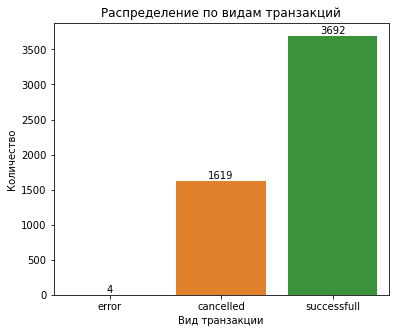

In [92]:
fig, ax = plt.subplots(figsize=(6,5))
sns.barplot(x='transaction', y='count', data=kind_of_trans, ax=ax)
ax.set_xlabel('Вид транзакции')
ax.set_ylabel('Количество')
ax.set_title('Распределение по видам транзакций')
ax.bar_label(ax.containers[0])

Сколько транзакций осуществил каждый из пользователей? Осуществлёнными считаются транзакции со значением successfull.

Посмотрите на характеристики распределения, а затем постройте гистограмму числа успешных транзакций, совершённых каждым пользователем.

In [99]:
succ_tran =df \
    .query('transaction == "successfull"') \
    .groupby('name', as_index=False) \
    .agg({'transaction':'count'}) \
    .rename(columns={'transaction':'count_of_succ_tran'})   

Text(0, 0.5, '')

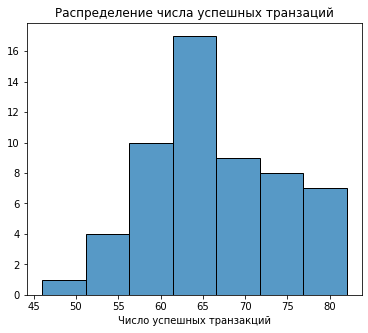

In [107]:
fig, ax = plt.subplots(figsize=(6,5))
sns.histplot(data=succ_tran, x='count_of_succ_tran')
ax.set_title('Распределение числа успешных транзаций')
ax.set_xlabel('Число успешных транзакций')
ax.set_ylabel('')

In [111]:
update_df = pd.read_csv('transaction_data_updated.csv', parse_dates=['date'])
update_df.head()

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17


К вам пришёл коллега с немного обновленными данными. Постройте сводную таблицу user_vs_minute_pivot, где:

столбцы – имена пользователей
строки – минута времени осуществления операции (minute)
значения – число совершённых операций
Пропущенные значения заполните нулями.

In [125]:
update_df['min_since_midnight'] = update_df.date.dt.minute + update_df.date.dt.hour * 60 
update_df

,date,name,transaction,minute,min_since_midnight
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6,66
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17,17
...,...,...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull,9,9
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull,46,46
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull,16,16
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull,13,13


In [124]:
tran_per_min = update_df \
    .groupby(['name','min_since_midnight'], as_index=False).size()
tran_per_min

,name,min_since_midnight,size
0,Ekaterina_Fedorova,0,1
1,Ekaterina_Fedorova,1,1
2,Ekaterina_Fedorova,2,1
3,Ekaterina_Fedorova,3,2
4,Ekaterina_Fedorova,4,2
...,...,...,...
3306,Vasilisa_Smirnova,82,2
3307,Vasilisa_Smirnova,85,1
3308,Vasilisa_Smirnova,86,1
3309,Vasilisa_Smirnova,87,2


In [126]:
user_vs_minute_pivot = tran_per_min.pivot(index='min_since_midnight', columns='name', values='size').fillna(0)
user_vs_minute_pivot.head()

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
min_since_midnight,,,,,,,,,,,,,,,,,,,,,
0,1.0,3.0,0.0,1.0,3.0,3.0,2.0,1.0,1.0,1.0,...,0.0,2.0,0.0,0.0,2.0,1.0,3.0,0.0,0.0,1.0
1,1.0,4.0,0.0,3.0,2.0,1.0,3.0,1.0,2.0,0.0,...,2.0,4.0,3.0,1.0,2.0,1.0,0.0,0.0,2.0,0.0
2,1.0,1.0,2.0,3.0,1.0,0.0,2.0,1.0,1.0,2.0,...,2.0,0.0,2.0,3.0,0.0,0.0,1.0,1.0,3.0,1.0
3,2.0,0.0,1.0,0.0,3.0,1.0,1.0,2.0,1.0,1.0,...,0.0,2.0,2.0,0.0,4.0,0.0,1.0,2.0,1.0,0.0
4,2.0,0.0,0.0,2.0,1.0,1.0,1.0,3.0,1.0,0.0,...,1.0,1.0,1.0,0.0,0.0,2.0,1.0,2.0,0.0,0.0


In [127]:
tran_in_min = user_vs_minute_pivot.sum(axis=1)

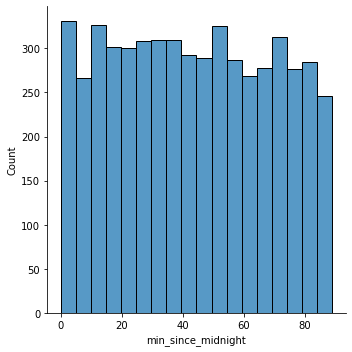

In [128]:
sns.displot(data=update_df, x='min_since_midnight')